<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
</div>

## Изучение данных из файла

In [120]:
#23.08.2021 - добавила метод display
import pandas as pd
import matplotlib.pyplot as plt #NEW
from IPython.display import display #NEW

data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
display(data.head(10)) #NEW
data.info()
#print(data.describe())
display(data.describe()) #NEW

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1) При выгрузке csv файла в Data Frame данные склеились в одну строку "\t". Я разделила их, указав на сепаратор "\t"

2) В данных есть пропущенные значения в столбцах.

## Предобработка данных

In [121]:
#1. определите и изучите пропущенные значения:
#---для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
#---заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
#---укажите причины, которые могли привести к пропускам в данных.
display(data.isnull().sum())

#Пропуски:
###########################
#1) ceiling_height - 9195
#Проверим возможные значения
print('Минимальная высота потолков -', data['ceiling_height'].min())
print('Максимальная высота потолков -', data['ceiling_height'].max())
#Проблемы при сборе данных
#Заполним пропущенные значения медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
###########################
#2) floors_total (86) -  немного, можем исключить
#data.dropna(subset = ['floors_total'], inplace = True)
data = data.dropna(subset = ['floors_total']) #NEW
###########################
#3) living_area (1903) -  немного + #5) kitchen_area (2231) - немного
print('Число симметричных значений living_area и kitchen_area:',
      data.loc[(data['living_area'].isna())
               &(data['kitchen_area'].isna()),'total_area'].count())
print(data['kitchen_area'].median())
#Заполним пропущенные значения кухни нулями (возможно не была заполнена для студий)
#data['kitchen_area'].fillna(0, inplace=True)
data['kitchen_area'] = data['kitchen_area'].fillna(0) #NEW
#Если кухня не заполнялась не для студий (площать > 40), то заполним медианой
data.loc[(data['total_area'] > 40) 
         & (data['kitchen_area']==0), 'kitchen_area'] = data['kitchen_area'].median()
#Заполняем living_area, зная total_area и kitchen_area
data.loc[(data['living_area'].isna()), 'living_area'] = data['total_area']-data['kitchen_area']
print(data.loc[(data['living_area'].isna())])
###########################
#4) is_apartment
print('Значения, принимаемые is_apartment')
print(data['is_apartment'].unique())
# Предпологаю, что значения не заполнялись, когда False
#data['is_apartment'].fillna(False, inplace = True)
data['is_apartment'] = data['is_apartment'].fillna(False) #NEW
###########################
#6) balcony
#Предполагаю, что не заполнены там, где нет балконов
#data['balcony'].fillna(0, inplace = True)
#NEW - заполнение нулем добавлено позже в цикле (над пунктом 14)
###########################
#7) locality_name - немного
#data.dropna(subset = ['locality_name'], inplace = True)
data = data.dropna(subset = ['locality_name']) #NEW
###########################
#8) airports_nearest 
#Проблемы при сборе данных
print('Значения медианы airports_nearest', data['airports_nearest'].median())
#Заполним пропущенные значения медианой
#data['airports_nearest'].fillna(data['airports_nearest'].median(), inplace = True)
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()) #NEW
###########################
#9) cityCenters_nearest - 5519
print('Значения медианы cityCenters_nearest', data['cityCenters_nearest'].median())
#Заполним пропущенные значения медианой
#data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median(), inplace = True)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) #NEW
###########################
#10) parks_around3000 и #11) parks_nearest
#Не заполнено, когда нет парков близко?
print('Число незаполненных одновременно parks_around3000 и parks_nearest'
      ,data.loc[(data['parks_around3000'].isna())
                &(data['parks_nearest'].isna())
                ,'parks_nearest'].count())
#data['parks_around3000'].fillna(0, inplace = True)
#data['parks_nearest'].fillna(0, inplace = True)
###########################
#12) ponds_around3000 и #13) ponds_nearest
#Не заполнено, когда нет озер близко?
print('Число незаполненных одновременно ponds_around3000 и ponds_nearest'
      ,data.loc[(data['ponds_around3000'].isna())
                &(data['ponds_nearest'].isna())
                ,'ponds_nearest'].count())
#data['ponds_around3000'].fillna(0, inplace = True)
#data['ponds_nearest'].fillna(0, inplace = True)

columns = ['balcony','parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest'] #NEW
for i in columns: #NEW
    data[i] = data[i].fillna(0) #NEW
###########################
#14) days_exposition - немного
#Пропуски days_exposition вероятно появились при загрузке данных
#data['days_exposition'].fillna(data['days_exposition'].median(), inplace = True)
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) #NEW
#2. приведите данные к нужным типам:
#---поясните, в каких столбцах нужно изменить тип данных и почему.
#Заменим тип данных на целочисленный
#data['...']  = data['...'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int64')

columns = ['airports_nearest'
           , 'parks_nearest','parks_around3000'
           ,'ponds_nearest', 'ponds_around3000'
           ,'floor','floors_total'] 

for i in columns: 
    data[i] = data[i].astype('int') 
data.info() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Минимальная высота потолков - 1.0
Максимальная высота потолков - 100.0
Число симметричных значений living_area и kitchen_area: 1431
9.1
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Значения, принимаемые is_apartment
[nan False True]
Значения медианы airports_nearest 26757.0
Значения медианы cityCenters_nearest 13096.5
Число незаполненных одновременно parks_around3000 и parks_nearest 0
Число незаполненных одновременно ponds_around3000 и ponds_nearest 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area         

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

## Расчёты и добавление результатов в таблицу

In [122]:
#1. цену квадратного метра;
data['price_sqm']=data['last_price']/data['total_area']
print('Средняя цена кв. метра - ',data['price_sqm'].median(), 'руб.')
#2. день недели, месяц и год публикации объявления;
import datetime
data['first_day_exposition'] = (
    pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
)
data['date_hour'] = data['first_day_exposition'].dt.round('1H')
#data['week_day'] = data['date_hour'].get_weekday()
data['week_number'] = pd.DatetimeIndex(data['date_hour']).weekday
data['month_number'] = pd.DatetimeIndex(data['date_hour']).month
data['year_number'] = pd.DatetimeIndex(data['date_hour']).year

def dayNameFromWeekday(weekday):
    if weekday == 0:
        return "1 Monday"
    if weekday == 1:
        return "2 Tuesday"
    if weekday == 2:
        return "3 Wednesday"
    if weekday == 3:
        return "4 Thursday"
    if weekday == 4:
        return "5 Friday"
    if weekday == 5:
        return "6 Saturday"
    if weekday == 6:
        return "7 Sunday"
    
def MonthNameFromNumber(month_number):
    if month_number == 1:
        return "1 January"
    if month_number == 2:
        return "2 February"
    if month_number == 3:
        return "3 March"
    if month_number == 4:
        return "4 April"
    if month_number == 5:
        return "5 May"
    if month_number == 6:
        return "6 June"
    if month_number == 7:
        return "7 July"
    if month_number == 8:
        return "8 August"
    if month_number == 9:
        return "9 September"
    if month_number == 10:
        return "_10 October"
    if month_number == 11:
        return "_11 November"
    if month_number == 12:
        return "_12 December"
    
data['week_name'] = data['week_number'].apply(dayNameFromWeekday)
data['month_name'] = data['month_number'].apply(MonthNameFromNumber)
print(data[['date_hour','week_name','month_name','year_number']])
####################################  
#3. этаж квартиры; варианты — первый, последний, другой;
def FloorName(floor, lastfloor):   
    if floor == 1:
        return "первый"
    elif floor == lastfloor:
        return "последний"
    else:
        return "другой"
#-------
def FloorName_N(floor, lastfloor):   
    if floor == 1:
        return 1
    elif floor == lastfloor:
        return 2
    else:
        return 3
data['floor_name']  = data.apply(lambda x: FloorName(x.floor, x.floors_total), axis=1)
print(data[['floor_name','floor', 'floors_total']].head(3))
data['floor_name_N'] = data.apply(lambda x: FloorName_N(x.floor, x.floors_total), axis=1)
###################################
#4. соотношение жилой и общей площади, а также отношение площади кухни к общей.
data['living2total'] = data['living_area']/data['total_area']
data['kitchen2total'] = data['kitchen_area']/data['total_area']
print("Среднее соотношение жилой и общей площади - {0:.2f}%".format(data['living2total'].median()*100))
print("Среднее соотношение кухни и общей площади - {0:.2f}%".format(data['kitchen2total'].median()*100))

Средняя цена кв. метра -  95000.0 руб.
       date_hour   week_name    month_name  year_number
0     2019-03-07  4 Thursday       3 March         2019
1     2018-12-04   2 Tuesday  _12 December         2018
2     2015-08-20  4 Thursday      8 August         2015
3     2015-07-24    5 Friday        7 July         2015
4     2018-06-19   2 Tuesday        6 June         2018
...          ...         ...           ...          ...
23694 2017-03-21   2 Tuesday       3 March         2017
23695 2018-01-15    1 Monday     1 January         2018
23696 2018-02-11    7 Sunday    2 February         2018
23697 2017-03-28   2 Tuesday       3 March         2017
23698 2017-07-21    5 Friday        7 July         2017

[23565 rows x 4 columns]
  floor_name  floor  floors_total
0     другой      8            16
1     первый      1            11
2     другой      4             5
Среднее соотношение жилой и общей площади - 58.06%
Среднее соотношение кухни и общей площади - 16.67%


## Исследовательский анализ данных

Минимальная площадь - 12.0
Максимальная площадь - 900.0


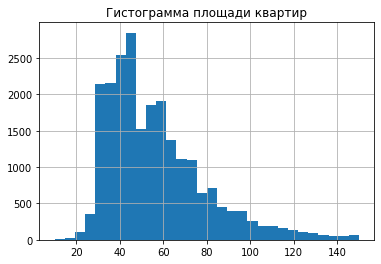

In [123]:
#import matplotlib.pyplot as plt
#1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков.
#2. Постройте гистограммы для каждого параметра.
print('Минимальная площадь -', data['total_area'].min())
print('Максимальная площадь -', data['total_area'].max())
data['total_area'].hist(bins=30,range=(10,150), label= 'Площадь')
plt.title('Гистограмма площади квартир') #NEW
plt.show() #NEW
#Больше всего продается квартир площадью 45-50 м.кв

Минимальная цена - 12190.0
Максимальная цена - 763000000.0


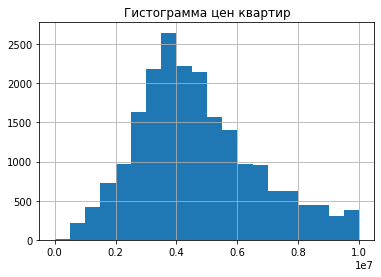

In [124]:
print('Минимальная цена -', data['last_price'].min())
print('Максимальная цена -', data['last_price'].max())
data['last_price'].hist(bins=20,range=(0,10000000), label = 'Цена')
plt.title('Гистограмма цен квартир') #NEW
plt.show() #NEW
#Больше всего квартир стоимостью 3-5 млн руб.

Минимальное число комнат - 0
Максимальное число комнат - 19


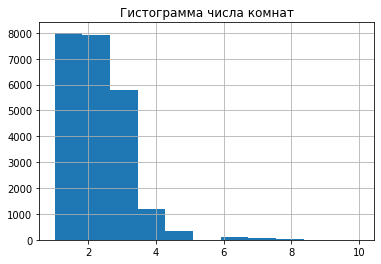

,rooms,total_area
648,11,183.7
866,14,363.0
4149,10,272.6
5358,15,590.0
8822,9,398.0
8860,9,235.0
9550,9,313.0
9688,11,194.1
13019,9,249.9
13397,9,309.7


In [125]:
print('Минимальное число комнат -', data['rooms'].min())
print('Максимальное число комнат -', data['rooms'].max())
data['rooms'].hist(bins=11,range=(1,10), label = 'Число комнат')
plt.title('Гистограмма числа комнат') #NEW
plt.show() #NEW
#Преобладают 1-е и 2-е квартиры
#проверим, что квартиры с числом комнат более 8 имеют площадь больше 200 кв м
display(data[['rooms','total_area']].loc[(data['rooms']> 8)]) #NEW - display вместо print

Минимальная высота потолков - 1.0
Максимальная высота потолков - 100.0


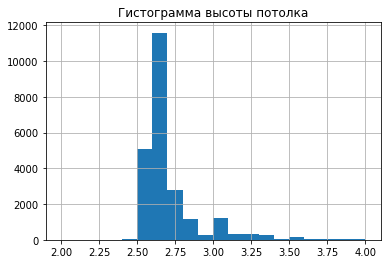

In [126]:
print('Минимальная высота потолков -', data['ceiling_height'].min())
print('Максимальная высота потолков -', data['ceiling_height'].max())
data['ceiling_height'].hist(bins=20,range=(2,4), label = 'Высота потолка')
plt.title('Гистограмма высоты потолка') #NEW
plt.show() #NEW
#Больше всего продаж квартир с высотой потока 2.6 м

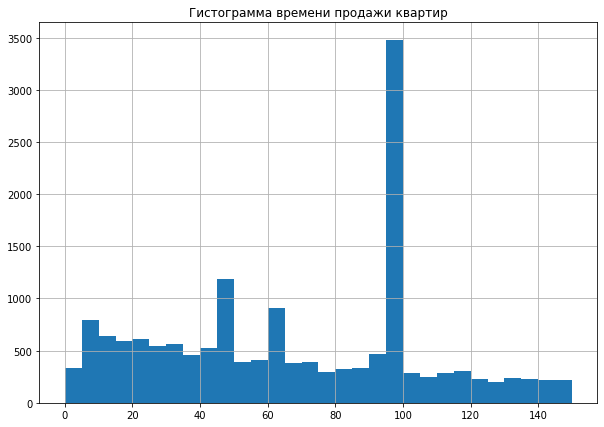

Арифм. среднее продажи квартиры 169.2036919159771 дней
Медиана продажи квартиры 95.0 дней


In [127]:
#3. Изучите время продажи квартиры. 
#4. Постройте гистограмму. 
plt.figure(figsize=(10,7))
data['days_exposition'].hist(bins=30,range=(0,150))
plt.title('Гистограмма времени продажи квартир')
plt.show()
data['days_exposition'].describe()
print('Арифм. среднее продажи квартиры',data['days_exposition'].mean(),'дней')
print('Медиана продажи квартиры',data['days_exposition'].median(),'дней')
#5. Посчитайте среднее и медиану. 
#---Опишите, сколько обычно занимает продажа. 
#Продажа обычно в среднем занимает от 90 до 100 дней
#---Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
#Можем считать, что продажа прошла быстро, если квартира была продана в течение 45 дней
#Можем считать, что продажа проходит долго, если квартира продается дольше 198 дней

In [108]:
#6. Уберите редкие и выбивающиеся значения.
data = data[data['days_exposition'] < 500]
#Убираем квадтиры, продающиеся дольше 500 дней
data = data[data['last_price'] < 100000000]
#Убираем квартиры стоимостью более 100 млн руб
data = data[data['total_area'] < 1000]
#Убираем квартиры площадью более 1000 кв м
#---Опишите, какие особенности обнаружили.
#---Какие факторы больше всего влияют на стоимость квартиры? 
#7. Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
print('Стоимость коррелирует с площадью с коэффициентом'
      ,data['last_price'].corr(data['total_area']))
print('Стоимость коррелирует с числом комнат с коэффициентом'
      , data['last_price'].corr(data['rooms']))
print('Стоимость не коррелирует с этажом, коэффициент  корреляции - '
      ,data['last_price'].corr(data['floor']))
print('Стоимость не коррелирует с удаленностью от центра, коэффициент  корреляции - '
      ,data['last_price'].corr(data['cityCenters_nearest']))
#8. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
print('Стоимость не коррелирует с этажом, коэффициент  корреляции - '
      ,data['last_price'].corr(data['floor_name_N']))

data.corr()['last_price']

Стоимость коррелирует с площадью с коэффициентом 0.7679420044602306
Стоимость коррелирует с числом комнат с коэффициентом 0.47139581811766523
Стоимость не коррелирует с этажом, коэффициент  корреляции -  0.041680821421710854
Стоимость не коррелирует с удаленностью от центра, коэффициент  корреляции -  -0.26129275668885604
Стоимость не коррелирует с этажом, коэффициент  корреляции -  0.07742248647467904


total_images           0.138055
last_price             1.000000
total_area             0.767942
rooms                  0.471396
ceiling_height         0.079244
floors_total           0.016361
living_area            0.667194
floor                  0.041681
is_apartment           0.025768
studio                -0.040543
open_plan             -0.012113
kitchen_area           0.544861
balcony                0.017108
airports_nearest      -0.010256
cityCenters_nearest   -0.261293
parks_around3000       0.276961
parks_nearest          0.188435
ponds_around3000       0.274967
ponds_nearest          0.129084
days_exposition        0.055023
price_sqm              0.702690
week_number           -0.000462
month_number           0.000943
year_number           -0.018893
floor_name_N           0.077422
living2total           0.012779
kitchen2total         -0.083173
Name: last_price, dtype: float64

In [109]:
#Корреляцию можно посчитать сразу для всех столбцов:
data.corr()['last_price']

total_images           0.138055
last_price             1.000000
total_area             0.767942
rooms                  0.471396
ceiling_height         0.079244
floors_total           0.016361
living_area            0.667194
floor                  0.041681
is_apartment           0.025768
studio                -0.040543
open_plan             -0.012113
kitchen_area           0.544861
balcony                0.017108
airports_nearest      -0.010256
cityCenters_nearest   -0.261293
parks_around3000       0.276961
parks_nearest          0.188435
ponds_around3000       0.274967
ponds_nearest          0.129084
days_exposition        0.055023
price_sqm              0.702690
week_number           -0.000462
month_number           0.000943
year_number           -0.018893
floor_name_N           0.077422
living2total           0.012779
kitchen2total         -0.083173
Name: last_price, dtype: float64

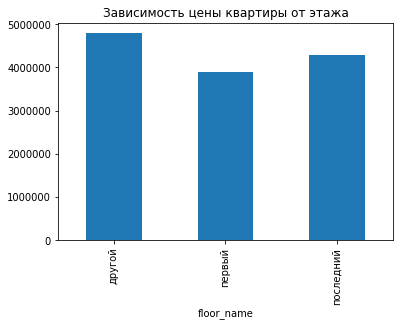

In [110]:
data.groupby('floor_name')['last_price'].median().plot(x='floor_name',y='last_price',kind='bar')
plt.title('Зависимость цены квартиры от этажа')       
plt.show()
#На первом этаже квартиры в среднем дешевле

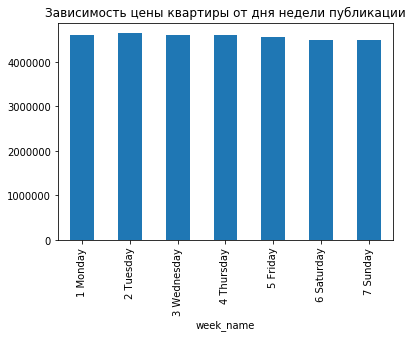

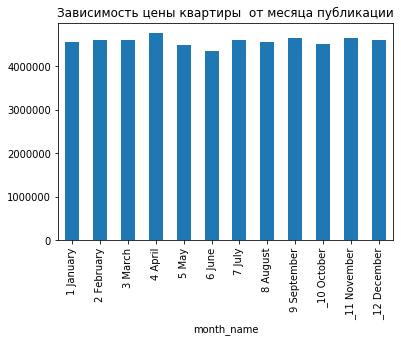

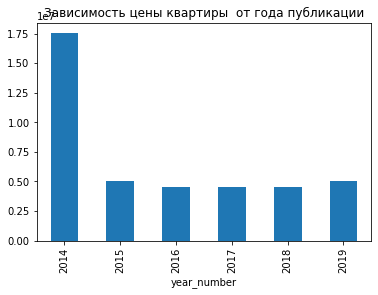

In [111]:
#Также изучите зависимость от даты размещения: дня недели, месяца, года
#data.groupby('week_name')['last_price'].count().plot(x='week_name',y='last_price',kind='bar')
#Применение for к гистограммам зависимости цены от дня недели, месяца, года

columns = ['week_name'
           , 'month_name'
           , 'year_number'
          ] 

for i in columns: 
    data.groupby(i)['last_price'].median().plot(x=i,y='last_price',kind='bar') 
    if i == 'week_name':
        plt.title('Зависимость цены квартиры от дня недели публикации')
    if i == 'month_name':
        plt.title('Зависимость цены квартиры  от месяца публикации')
    if i == 'year_number':
        plt.title('Зависимость цены квартиры  от года публикации')       
    plt.show() 
#В 2014 году было опубликовано больше дорогих квартир

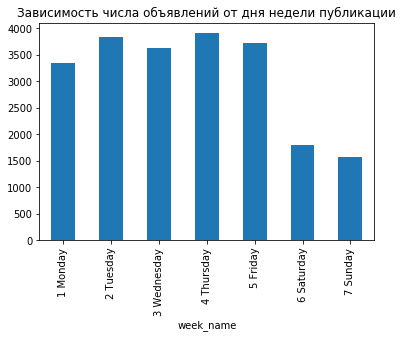

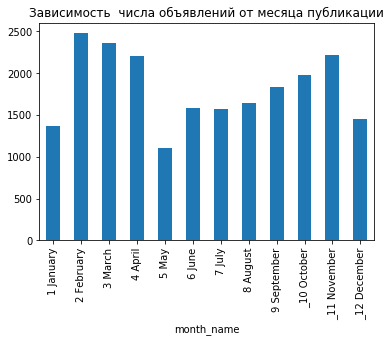

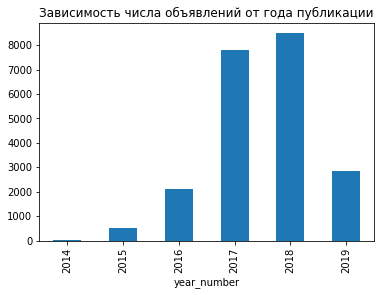

In [112]:
#Также изучите зависимость от даты размещения: дня недели, месяца, года
#data.groupby('week_name')['last_price'].count().plot(x='week_name',y='last_price',kind='bar')
#Применение for к гистограммам зависимости числа объявлений от дня недели, месяца, года
columns = ['week_name'
           , 'month_name'
           , 'year_number'
          ] 

for i in columns: 
    data.groupby(i)['last_price'].count().plot(x=i,y='last_price',kind='bar')
    if i == 'week_name':
        plt.title('Зависимость числа объявлений от дня недели публикации')
    if i == 'month_name':
        plt.title('Зависимость  числа объявлений от месяца публикации')
    if i == 'year_number':
        plt.title('Зависимость числа объявлений от года публикации')       
    plt.show()
#Чаще всего объявления публиковались во вторник, четверг и пятницу. В выходные меньше всего.
#Меньше всего объявлений публикуется в декабре, январе, мае.

In [113]:
#9. Выберите 10 населённых пунктов с наибольшим числом объявлений.
#10. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце 'locality_name'.
data_agg_loc = data.pivot_table(index='locality_name',values='price_sqm',aggfunc=('count','median'))
data_agg_loc.sort_values(by='count',ascending=False).head(10)

#В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 кв м
#В Выборге меньше всего объявлений и самая низкая стоимость 1 кв м среди городо Топ-10 по числу объявлений

,count,median
locality_name,,
Санкт-Петербург,14407,104662.162162
посёлок Мурино,488,86250.377687
посёлок Шушары,416,76666.666667
Всеволожск,367,65648.854962
Пушкин,340,99993.589744
Колпино,323,74657.534247
посёлок Парголово,312,91387.362637
Гатчина,283,67695.961995
деревня Кудрово,266,92044.864227


0    16028.0
1    18603.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64


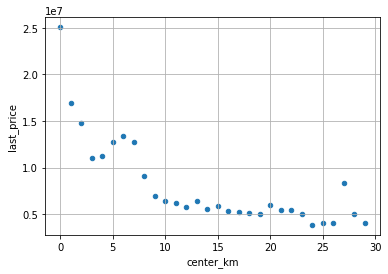

In [114]:
#11. Изучите предложения квартир: 
#для каждой квартиры есть информация о расстоянии до центра. 
print(data['cityCenters_nearest'].head(4))
#Выделите квартиры в Санкт-Петербурге ('locality_name'). 
#Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
data['center_km'] = round(data['cityCenters_nearest'] / 1000, 0)
spb_city = data.loc[(data['locality_name'] == 'Санкт-Петербург')]
spb_city = spb_city.dropna(subset = ['cityCenters_nearest'], inplace = False) 
spb_city['center_km'] = round(spb_city['cityCenters_nearest'] / 1000, 0)
#После этого посчитайте среднюю цену для каждого километра.
spb_segment = spb_city.groupby(by = ['center_km'], as_index=False).mean()
#spb_center_pivot = spb_city.pivot_table(index='center_km', values=['price_sqm', 'last_price'], aggfunc='median')

#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
spb_segment.plot(x='center_km', y = 'last_price', kind = 'scatter',grid=True)
#Определите границу, где график сильно меняется — это и будет центральная зона.
# --  8  км - граница центральной зоны

,total_area,last_price,rooms,ceiling_height
3,159.00,64900000.0,3,2.65
4,100.00,10000000.0,2,3.03
24,97.20,6500000.0,2,2.65
52,136.00,11795000.0,6,3.00
63,118.00,20000000.0,3,3.00
...,...,...,...,...
23644,62.50,4990000.0,2,2.70
23665,47.00,4250000.0,1,2.65
23681,43.00,5250000.0,2,2.50
23690,52.00,5500000.0,2,2.65


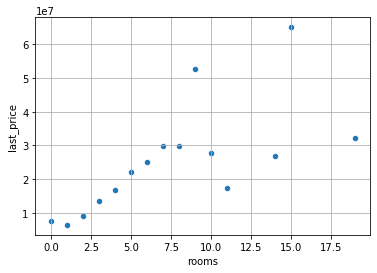

In [115]:
#12. Выделите сегмент квартир в центре. 
spb_center = spb_city[spb_city['center_km'] <= 8]
#13. Проанализируйте эту территорию и изучите следующие параметры: 
#площадь, цена, число комнат, высота потолков. - 'total_area','last_price','rooms','ceiling_height'
display(spb_center[['total_area','last_price','rooms','ceiling_height']])
#Также выделите факторы, которые влияют на стоимость квартиры
#(число комнат, этаж, удалённость от центра, дата размещения объявления). 
#'rooms'
spb_rooms = spb_center.groupby(by = ['rooms'], as_index=False).mean()
spb_rooms.plot(x='rooms', y = 'last_price', kind = 'scatter',grid=True)
#Цена зависит от числа комнат (скорее всего потому, что число комнат коррелирует с площадью)

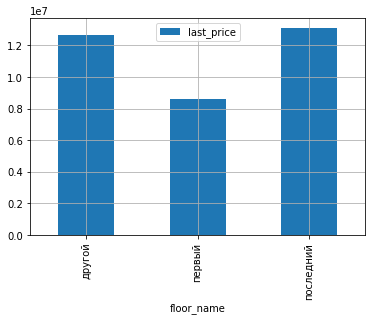

In [116]:
#floor_name_N'
spb_floor = spb_center.groupby(by = ['floor_name'], as_index=False).mean()
spb_floor.plot(x='floor_name', y = 'last_price', kind = 'bar',grid=True)
#На первом этаже в среднем квартиры дешевле

[2 3 4 5]


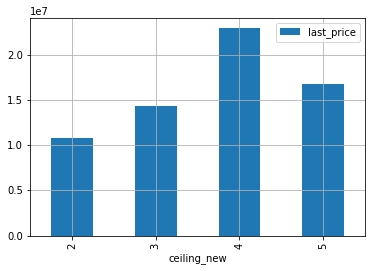

In [119]:
#высота потолков 'ceiling_height'
spb_center = spb_center.loc[(spb_center['ceiling_height']<20)] #NEW, исключила 5 строк, где высота потолка больше 20 метров
spb_center['ceiling_new'] = spb_center['ceiling_height'].astype(int)
print(spb_center['ceiling_new'].unique())
spb_ceiling = spb_center.groupby(by = ['ceiling_new'], as_index=False).mean()
spb_ceiling.plot(x='ceiling_new', y = 'last_price', kind = 'bar',grid=True)
#plt.title('Зависимость цены квартиры в С-П от высоты потолка')       
#    plt.show() #NEW
#Чем выше потолок, тем дороже квартира

## Общий вывод

Мы определили, что 

1 стоимость объектов недвижимости зависит от следующих факторов:
    общая площадь квартиры,
    расстояние до центра города,
    число комнат (вероятно потому, что чило комнат зависит от общей площади квартиры),
    этаж квартиры.

2 центр С-П находится в радиусе 8 км

3 стоимость квартир в центре С-П также зависит от факторов:
    площадь, число комнат,
    высота потолков.

<div class="alert alert-success">
<b>Комментарий:</b>

Для стилизации проекта можно использовать:
https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод